In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_excel('WHO_India_Cities_Air_Quality_2022_subset.xlsx')
df.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference
0,South East Asia Region,IND,India,Adilabad,2016,32.0,63.0,19.0,59.615385,60.576923,55.769231,Central Pollution Control Board
1,South East Asia Region,IND,India,Adilabad,2017,31.0,65.0,20.0,87.500000,87.500000,87.500000,Central Pollution Control Board
2,South East Asia Region,IND,India,Adilabad,2018,33.0,69.0,23.0,82.692308,82.692308,82.692308,Central Pollution Control Board
3,South East Asia Region,IND,India,Adilabad,2019,45.0,74.0,25.0,86.538461,100.000000,100.000000,Central Pollution Control Board
4,South East Asia Region,IND,India,Adilabad District,2013,NaN,NaN,14.0,NaN,NaN,25.961538,Central Pollution Control Board


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WHO Region                  2265 non-null   object 
 1   ISO3                        2265 non-null   object 
 2   WHO Country Name            2265 non-null   object 
 3   City or Locality            2265 non-null   object 
 4   Measurement Year            2265 non-null   int64  
 5   PM2.5 (μg/m3)               421 non-null    float64
 6   PM10 (μg/m3)                1197 non-null   float64
 7   NO2 (μg/m3)                 2131 non-null   float64
 8   PM25 temporal coverage (%)  441 non-null    float64
 9   PM10 temporal coverage (%)  1212 non-null   float64
 10  NO2 temporal coverage (%)   2184 non-null   float64
 11  Reference                   2265 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 212.5+ KB


In [4]:
df.describe()

,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%)
count,2265.000000,421.000000,1197.00000,2131.000000,441.000000,1212.000000,2184.000000
mean,2015.241943,40.444798,98.32452,21.966096,72.796073,86.650289,83.685706
std,2.986085,20.200245,50.34706,12.711148,27.368950,18.209648,21.855401
min,2010.000000,7.000000,8.50000,2.000000,1.923077,6.730769,1.923077
25%,2013.000000,28.000000,63.00000,13.000000,53.846154,81.250000,76.923077
50%,2016.000000,36.000000,88.00000,19.000000,82.692308,94.230769,93.269231
75%,2018.000000,47.000000,119.00000,28.000000,98.076923,100.000000,100.000000
max,2019.000000,123.500000,322.00000,87.500000,100.000000,100.000000,100.000000


In [5]:
df.isnull().sum()

WHO Region                       0
ISO3                             0
WHO Country Name                 0
City or Locality                 0
Measurement Year                 0
PM2.5 (μg/m3)                 1844
PM10 (μg/m3)                  1068
NO2 (μg/m3)                    134
PM25 temporal coverage (%)    1824
PM10 temporal coverage (%)    1053
NO2 temporal coverage (%)       81
Reference                        0
dtype: int64

## Handle missing values

In [6]:
df = df.dropna()

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)

## Select features and target

In [8]:
target = "PM2.5 (μg/m3)"

X = df.drop(columns=[target])
y = df[target]

## Encode categorical variables

In [9]:
X = pd.get_dummies(X, drop_first=True)

## Train–test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature scaling

In [11]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL 1: Linear Regression

In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
y_train_pred_lr = lr.predict(X_train_scaled)

mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
r2_train_lr = r2_score(y_train, y_train_pred_lr)

In [14]:
y_test_pred_lr = lr.predict(X_test_scaled)

mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)

In [15]:
print("Linear Regression Performance")

print("\nTraining Data:")
print("MSE:", mse_train_lr)
print("RMSE:", rmse_train_lr)
print("R²:", r2_train_lr)

print("\nTesting Data:")
print("MSE:", mse_test_lr)
print("RMSE:", rmse_train_lr)
print("R²:", r2_test_lr)

Linear Regression Performance

Training Data:
MSE: 26.85758899445566
RMSE: 5.182430799774915
R²: 0.9358306574923526

Testing Data:
MSE: 104.82149229398253
RMSE: 5.182430799774915
R²: 0.7282791454239853


## MODEL 2: Random Forest Regressor

In [16]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [17]:
y_train_pred_rf = rf.predict(X_train)

mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

In [18]:
y_test_pred_rf = rf.predict(X_test)

mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

In [19]:
print("\nRandom Forest Performance")

print("\nTraining Data:")
print("MSE:", mse_train_rf)
print("RMSE:", rmse_train_rf)
print("R²:", r2_train_rf)

print("\nTesting Data:")
print("MSE:", mse_test_rf)
print("RMSE:", rmse_test_rf)
print("R²:", r2_test_rf)


Random Forest Performance

Training Data:
MSE: 14.737547716369246
RMSE: 3.838951382391974
R²: 0.9647883975240771

Testing Data:
MSE: 105.45859916329265
RMSE: 10.269303733130725
R²: 0.7266276213023894


## Regression Results

In [20]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],

    "Train MSE": [mse_train_lr, mse_train_rf],
    "Test MSE": [mse_test_lr, mse_test_rf],

    "Train RMSE": [rmse_train_lr, rmse_train_rf],
    "Test RMSE": [rmse_test_lr, rmse_test_rf],

    "Train R2": [r2_train_lr, r2_train_rf],
    "Test R2": [r2_test_lr, r2_test_rf]
})

results

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2
0,Linear Regression,26.857589,104.821492,5.182431,10.238237,0.935831,0.728279
1,Random Forest,14.737548,105.458599,3.838951,10.269304,0.964788,0.726628


## Feature importance (Random Forest)

In [21]:
importances = rf.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)

,Feature,Importance
1,PM10 (μg/m3),0.769797
2,NO2 (μg/m3),0.061912
3,PM25 temporal coverage (%),0.021029
4,PM10 temporal coverage (%),0.020450
5,NO2 temporal coverage (%),0.019124
99,City or Locality_Muzaffarpur,0.015964
0,Measurement Year,0.012587
31,City or Locality_Byrnihat,0.009635
43,City or Locality_Daman,0.005866
133,City or Locality_Silvassa,0.005677


## Visualization

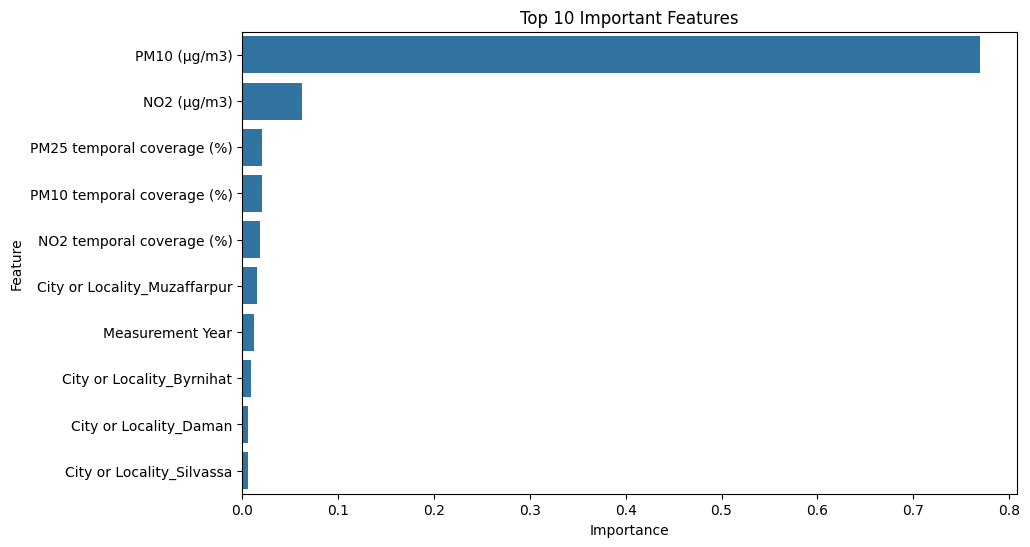

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df.head(10)
)
plt.title("Top 10 Important Features")
plt.show()

# Classification

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Create Air Quality Classes

In [24]:
def air_quality_category(pm25):
    if pm25 <= 25:
        return "Good"
    elif pm25 <= 50:
        return "Moderate"
    else:
        return "Poor"

df["Air_Quality_Class"] = df["PM2.5 (μg/m3)"].apply(air_quality_category)

In [25]:
df["Air_Quality_Class"].value_counts()

Air_Quality_Class
Moderate    252
Poor         80
Good         75
Name: count, dtype: int64

## Define features and target

In [26]:
X = df.drop(columns=["PM2.5 (μg/m3)", "Air_Quality_Class"])
y = df["Air_Quality_Class"]

## Encode categorical variables

In [27]:
X = pd.get_dummies(X, drop_first=True)

## Train–test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature scaling

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODEL 1: Logistic Regression (Classification)

In [30]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_train_pred_log = log_model.predict(X_train_scaled)
train_acc_log = accuracy_score(y_train, y_train_pred_log)

print("Training Accuracy:", train_acc_log)
print("\nTRAIN Classification Report:\n",
      classification_report(y_train, y_train_pred_log))

Training Accuracy: 0.92

TRAIN Classification Report:
               precision    recall  f1-score   support

        Good       0.92      0.92      0.92        60
    Moderate       0.93      0.94      0.94       201
        Poor       0.89      0.86      0.87        64

    accuracy                           0.92       325
   macro avg       0.91      0.91      0.91       325
weighted avg       0.92      0.92      0.92       325



In [32]:
y_test_pred_log = log_model.predict(X_test_scaled)
test_acc_log  = accuracy_score(y_test, y_test_pred_log)

print("Testing Accuracy:", test_acc_log)
print("\nTEST Classification Report:\n",
      classification_report(y_test, y_test_pred_log))

Testing Accuracy: 0.7317073170731707

TEST Classification Report:
               precision    recall  f1-score   support

        Good       0.60      0.40      0.48        15
    Moderate       0.76      0.82      0.79        51
        Poor       0.71      0.75      0.73        16

    accuracy                           0.73        82
   macro avg       0.69      0.66      0.67        82
weighted avg       0.72      0.73      0.72        82



## Confusion matrix

In [33]:
def plot_conf_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
                xticklabels=labels,
                yticklabels=labels)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

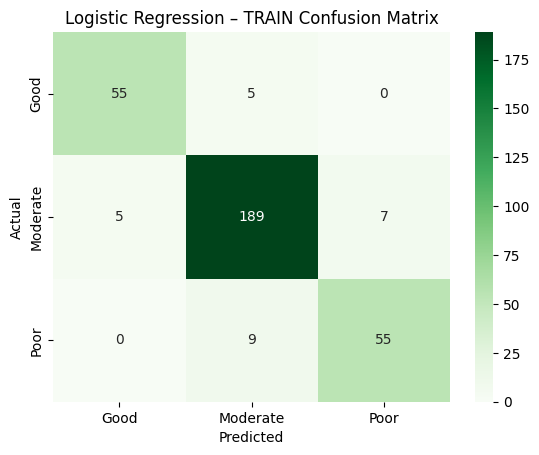

In [78]:
plot_conf_matrix(
    y_train,
    y_train_pred_log,
    "Logistic Regression – TRAIN Confusion Matrix",
    log_model.classes_
)

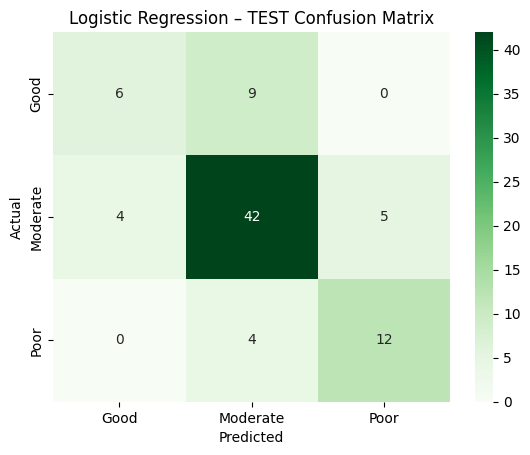

In [34]:
plot_conf_matrix(
    y_test,
    y_test_pred_log,
    "Logistic Regression – TEST Confusion Matrix",
    log_model.classes_
)

## MODEL 2: Random Forest Classifier

In [35]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [36]:
y_train_pred_rf = rf_clf.predict(X_train)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)

print("Training Accuracy:", train_acc_rf)
print("\nTRAIN Classification Report:\n",
      classification_report(y_train, y_train_pred_rf))

Training Accuracy: 1.0

TRAIN Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00        60
    Moderate       1.00      1.00      1.00       201
        Poor       1.00      1.00      1.00        64

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325



In [37]:
y_test_pred_rf = rf_clf.predict(X_test)
test_acc_rf  = accuracy_score(y_test,  y_test_pred_rf)

print("Testing Accuracy:", test_acc_rf)
print("\nTEST Classification Report:\n",
      classification_report(y_test, y_test_pred_rf))

Testing Accuracy: 0.8658536585365854

TEST Classification Report:
               precision    recall  f1-score   support

        Good       0.90      0.60      0.72        15
    Moderate       0.84      0.96      0.90        51
        Poor       0.93      0.81      0.87        16

    accuracy                           0.87        82
   macro avg       0.89      0.79      0.83        82
weighted avg       0.87      0.87      0.86        82



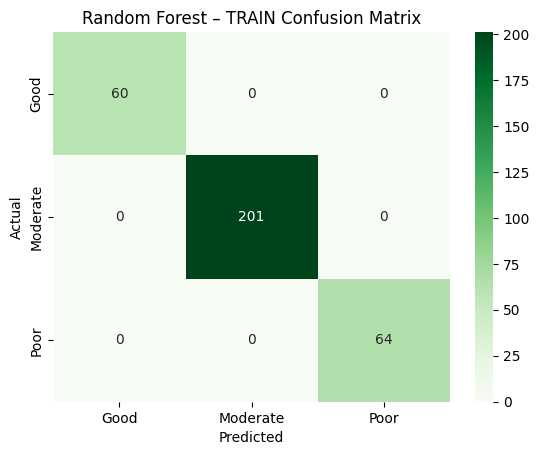

In [38]:
plot_conf_matrix(
    y_train,
    y_train_pred_rf,
    "Random Forest – TRAIN Confusion Matrix",
    rf_clf.classes_
)

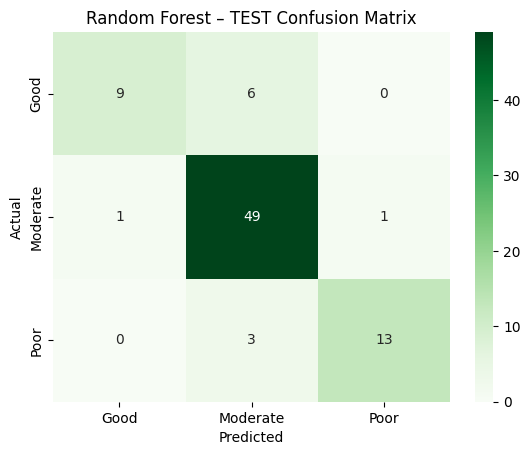

In [39]:
plot_conf_matrix(
    y_test,
    y_test_pred_rf,
    "Random Forest – TEST Confusion Matrix",
    rf_clf.classes_
)

## Feature importance (Random Forest)

In [40]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_clf.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)

,Feature,Importance
1,PM10 (μg/m3),0.224642
2,NO2 (μg/m3),0.162433
3,PM25 temporal coverage (%),0.069309
4,PM10 temporal coverage (%),0.067036
5,NO2 temporal coverage (%),0.062890
0,Measurement Year,0.043228
21,City or Locality_Begusarai,0.012339
147,City or Locality_Usgao,0.009384
51,City or Locality_Durgapur,0.009330
88,City or Locality_Kundaim,0.008859


## Classification Results

In [41]:
train_report_log = classification_report(y_train, y_train_pred_log, output_dict=True)
test_report_log  = classification_report(y_test,  y_test_pred_log,  output_dict=True)

train_prec_log = train_report_log["weighted avg"]["precision"]
train_rec_log  = train_report_log["weighted avg"]["recall"]
train_f1_log   = train_report_log["weighted avg"]["f1-score"]

test_prec_log = test_report_log["weighted avg"]["precision"]
test_rec_log  = test_report_log["weighted avg"]["recall"]
test_f1_log   = test_report_log["weighted avg"]["f1-score"]

train_report_rf = classification_report(y_train, y_train_pred_rf, output_dict=True)
test_report_rf  = classification_report(y_test,  y_test_pred_rf,  output_dict=True)

train_prec_rf = train_report_rf["weighted avg"]["precision"]
train_rec_rf  = train_report_rf["weighted avg"]["recall"]
train_f1_rf   = train_report_rf["weighted avg"]["f1-score"]

test_prec_rf = test_report_rf["weighted avg"]["precision"]
test_rec_rf  = test_report_rf["weighted avg"]["recall"]
test_f1_rf   = test_report_rf["weighted avg"]["f1-score"]

In [42]:
classification_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],

    "Train Accuracy": [train_acc_log, train_acc_rf],
    "Test Accuracy":  [test_acc_log,  test_acc_rf],

    "Train Precision": [train_prec_log, train_prec_rf],
    "Test Precision":  [test_prec_log,  test_prec_rf],

    "Train Recall": [train_rec_log, train_rec_rf],
    "Test Recall":  [test_rec_log,  test_rec_rf],

    "Train F1 Score": [train_f1_log, train_f1_rf],
    "Test F1 Score":  [test_f1_log,  test_f1_rf],
})

classification_results

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 Score,Test F1 Score
0,Logistic Regression,0.92,0.731707,0.91973,0.722434,0.92,0.731707,0.919807,0.722579
1,Random Forest,1.00,0.865854,1.00000,0.871260,1.00,0.865854,1.000000,0.859999
